## **PIYUSHA RAJENDRA SUPE 23CO315**
MINIPROJECT - DSBDA

Use the following dataset and classify tweets into positive and negative tweets.
https://www.kaggle.com/ruchi798/data-science-tweets

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
files.upload()

Saving data_science.csv to data_science.csv
Buffered data was truncated after reaching the output size limit.

In [7]:
# Load dataset
file_path = "data_science.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Keep only relevant columns
df = df[['tweet']].dropna()

<ipython-input-7-b1d7d74f35a9>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [19]:
#Exploratory data analysis
df.head()

,tweet,cleaned_tweet,label
0,What can be done? - Never blindly trust an ab...,what can be done never blindly trust an abst...,negative
1,"""We need a paradigm shift from model-centric t...",we need a paradigm shift from modelcentric to ...,negative
2,Using high-resolution satellite data and compu...,using highresolution satellite data and comput...,negative
3,.@Stephenson_Data shares four steps that will ...,shares four steps that will help new data sci...,negative
4,"""Curricula is inherently brittle in a world wh...",curricula is inherently brittle in a world whe...,negative


In [20]:
df.tail()

,tweet,cleaned_tweet,label
241381,"Cda jobs data, Dec: employment rose in health,...",cda jobs data dec employment rose in health so...,negative
241382,RT @filiber: Have a Computer Science backgroun...,rt have a computer science background love de...,positive
241383,@pop17 Heck with science. I've got empirical d...,heck with science ive got empirical data heh heh,negative
241384,All in the....data RT @noahWG Dr. Petra provid...,all in thedata rt dr petra provides perspecti...,negative
241385,“The world of retail will always be a mix of a...,the world of retail will always be a mix of ar...,negative


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241386 entries, 0 to 241385
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tweet          241386 non-null  object
 1   cleaned_tweet  241386 non-null  object
 2   label          241386 non-null  object
dtypes: object(3)
memory usage: 5.5+ MB


In [22]:
df.describe()

,tweet,cleaned_tweet,label
count,241386,241386,241386
unique,231087,199580,2
top,What to Do on Your First Day as Data Science L...,data science daily is out stories via,negative
freq,214,354,226367


In [23]:
df.describe(include="all")

,tweet,cleaned_tweet,label
count,241386,241386,241386
unique,231087,199580,2
top,What to Do on Your First Day as Data Science L...,data science daily is out stories via,negative
freq,214,354,226367


In [24]:
df.shape

(241386, 3)

In [25]:
df.size

724158

In [26]:
df.ndim

2

In [27]:
df.columns

Index(['tweet', 'cleaned_tweet', 'label'], dtype='object')

In [29]:
df.isnull()

,tweet,cleaned_tweet,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
241381,False,False,False
241382,False,False,False
241383,False,False,False
241384,False,False,False


In [30]:
df.isna()

,tweet,cleaned_tweet,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
241381,False,False,False
241382,False,False,False
241383,False,False,False
241384,False,False,False


In [31]:
df.isnull().any()

,0
tweet,False
cleaned_tweet,False
label,False


In [32]:
df.isnull().sum()

,0
tweet,0
cleaned_tweet,0
label,0


In [8]:
# Text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"\@\w+|\#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    return text

# Apply text cleaning
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

<ipython-input-13-9a4a9ad53d4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='viridis')


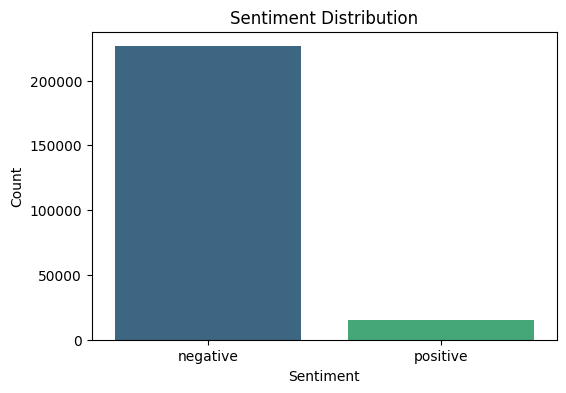

In [13]:

# Generate synthetic labels (basic sentiment classification)
df['label'] = df['cleaned_tweet'].apply(lambda x: 'positive' if any(word in x for word in ['good', 'great', 'love', 'excellent', 'amazing']) else 'negative')

# Visualize label distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

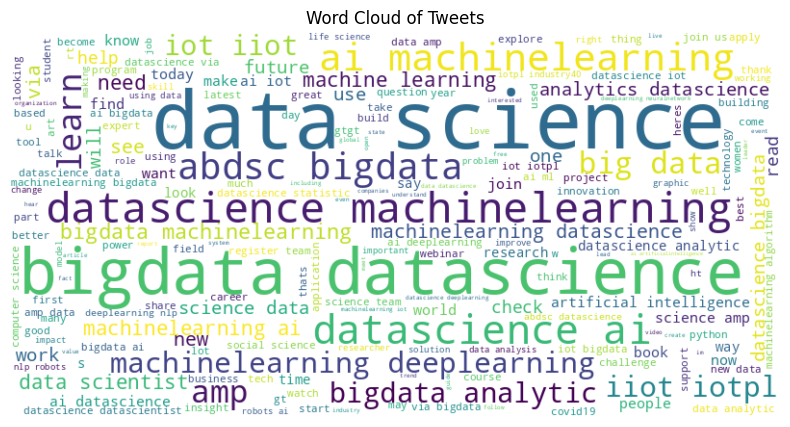

In [14]:

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_tweet']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

In [15]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_tweet'], df['label'], test_size=0.2, random_state=42)

# Create a text classification pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [16]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

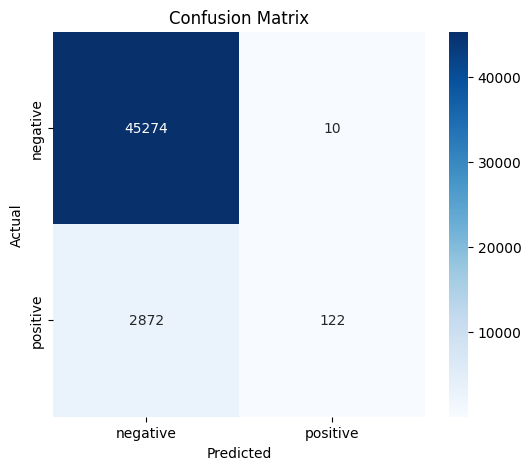

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

    negative       0.94      1.00      0.97     45284
    positive       0.92      0.04      0.08      2994

    accuracy                           0.94     48278
   macro avg       0.93      0.52      0.52     48278
weighted avg       0.94      0.94      0.91     48278



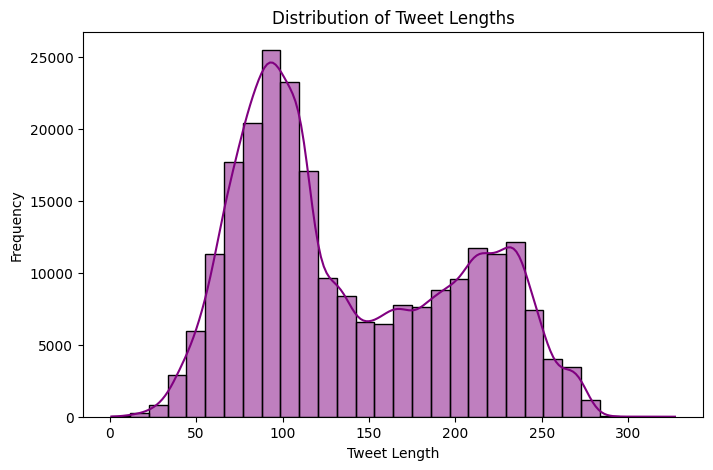

In [34]:
# Plot the length distribution of tweets
df['tweet_length'] = df['cleaned_tweet'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['tweet_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()


<ipython-input-35-0b6feb907a09>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


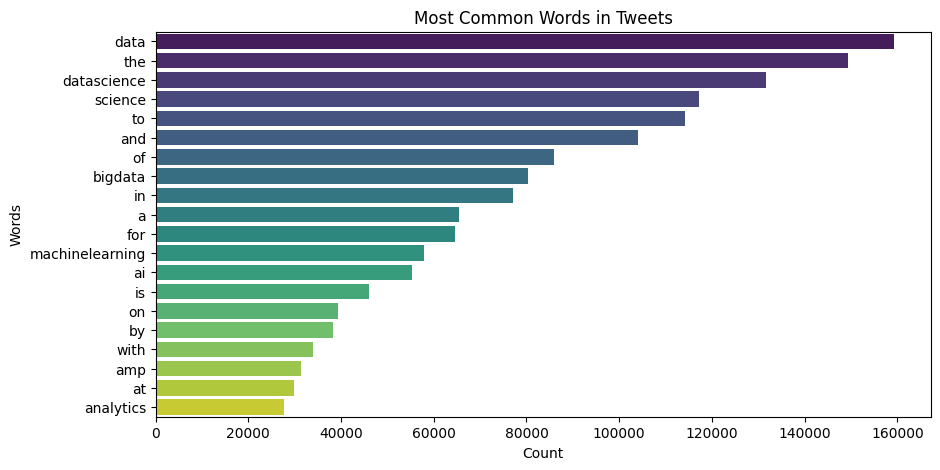

In [35]:

# Bar plot of most frequent words
from collections import Counter
import itertools

all_words = list(itertools.chain(*[tweet.split() for tweet in df['cleaned_tweet']]))
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Count")
plt.ylabel("Words")
plt.title("Most Common Words in Tweets")
plt.show()


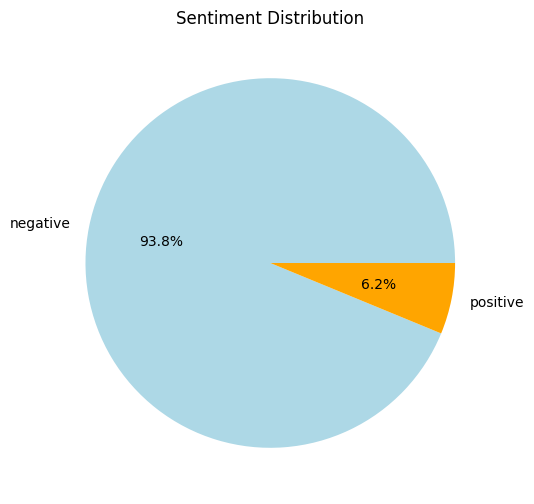

In [36]:

# Pie chart of sentiment distribution
plt.figure(figsize=(6,6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "orange"])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

**PIYUSHA RAJENDRA SUPE
23CO315**